In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc
import _ressources.configreader as configreader

#main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/hydrosmotic_hydraulic/versus/N1000_hydraulic/'
main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/'
data_dir = ''

mu = (np.sin(np.pi/3.))**2 / (2*np.pi/3. - np.sin(2*np.pi/3.))

======= CHAIN =======
Type         : hydroosmotic
Total length : 6.169931301446744
Current Time : 0
Screening lengths : 
        xi_s = 0.003931901952165773
        xi_v = 0.003931901952165773
Permeation times :
       tau_s = 1.0
       tau_v = 1.0
Pumping : constant
======= LUMENS =======
Nb lumens : 2
Lumen 0 is at position 0.00000 with length 0.00000 and 0.00000 ions with pumping 0.00110
Lumen 1 is at position 1.91665 with length 0.91665 and 1.37617 ions with pumping 0.00110
Lumen 2 is at position 4.18118 with length 0.98875 and 1.60117 ions with pumping 0.00110
Lumen -1 is at position 6.16993 with length 0.00000 and 0.00000 ions with pumping 0.00110
======= BRIDGES ======
Bridge 0 : (0, 1) has length 1.00000 with pumping 0.00000
Bridge 1 : (1, 2) has length 0.35914 with pumping 0.00000
Bridge 2 : (2, -1) has length 1.00000 with pumping 0.00000



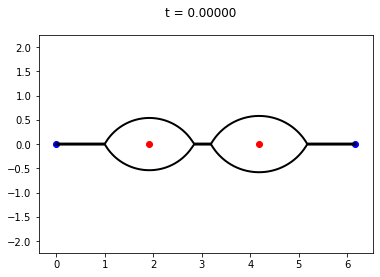

Import successful !


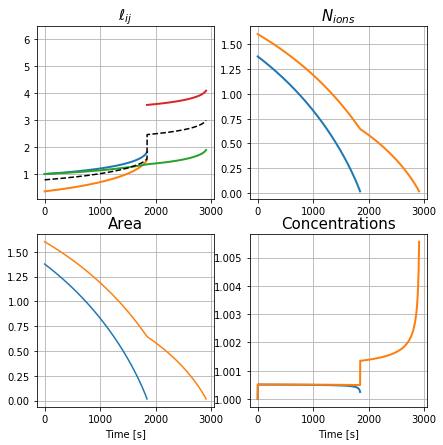

In [4]:
subdir = '2lumens'
conf, ch = chain.load_config(os.path.join(main_dir, subdir, 'config.conf'))
print(ch)
x = np.linspace(0., ch.total_length, 1001)
tools.plot_profile(x, ch)

ell = tools.load_brfile(os.path.join(main_dir, subdir, 'sim_bridges.dat'))

x_log = 0

if ch.lumen_type == 'hydroosmotic' :
    L, nions, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=True)
    tools.plot_evolution(L, nions, ell, x_logscale=x_log)
else :
    L, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=False)
    tools.plot_evolution_hydraulic(L, ell, x_logscale=x_log)





In [4]:
def search_value(filename, value_name) :
    my_file = open(filename).readlines()
    for line in end_file :
        if line.find(value_name) != -1 :
            value = line.split(' ')[-1]
    return value


In [6]:
try : 
    os.mkdir(os.path.join(main_dir, 'bis'))
    os.mkdir(os.path.join(main_dir, 'bis', 'pics'))
except : pass

config = configreader.Config()
new_conf = config.read(os.path.join(main_dir, 'config.conf'))
end_file = open(os.path.join(main_dir, 'end_chain.dat')).readlines()



nb_lumens = int(search_value(os.path.join(main_dir, 'end_chain.dat'), 'Nb lumens'))

chain_type = new_conf['sim']['chain_type']
e0 = float(new_conf['sim']['e0'])
l_dis = float(new_conf['topology']['l_dis'])
l_merge = float(new_conf['topology']['l_merge'])

theta = np.pi/3.
eps = float(new_conf['topology']['eps'])
pbc = False


if chain_type == 'hydraulic' :
    new_ch = lc.Chain(nb_lumens=nb_lumens, e0 = e0, theta=theta, l_dis=l_dis, l_merge=l_merge, pbc=pbc)
elif chain_type == 'hydroosmotic' :
    new_ch = lc.Osmotic_Chain(nb_lumens=nb_lumens, e0 = e0, theta=theta, l_dis=l_dis, l_merge=l_merge, pbc=pbc)
    new_ch.xis = float(search_value(os.path.join(main_dir, 'end_chain.dat'), 'xi_s'))
    new_ch.xiv = float(search_value(os.path.join(main_dir, 'end_chain.dat'), 'xi_v'))
    new_ch.taus = float(search_value(os.path.join(main_dir, 'end_chain.dat'), 'tau_s'))
    new_ch.tauv = float(search_value(os.path.join(main_dir, 'end_chain.dat'), 'tau_v'))
    new_ch.pumping = eval(new_conf['sim']['pumping'])
    new_ch.merge = eval(new_conf['topology']['merge'])
    
new_ch.lumens_dict, new_ch.bridges_dict = {}, {}
new_ch.time = float(search_value(os.path.join(main_dir, 'end_chain.dat'), 'Current Time'))
new_ch.total_length = float(search_value(os.path.join(main_dir, 'end_chain.dat'), 'Total length'))



In [7]:
for line in end_file :
    if line.startswith('Lumen') :
        lum = line.split(' ')
        #print(lum)
        index = int(lum[1])
        init_pos = float(lum[5])
        init_length = float(lum[8])
        init_nb_ions = float(lum[10])
        ca = float(lum[14])
        new_ch.lumens_dict[index] = lc.Osmotic_Lumen(index, init_pos, init_length, init_nb_ions, theta, eps, ca)
        
for line in end_file :
    if line.startswith('Bridge') :
        bridge = line.split(' ')
        index = int(bridge[1])
        lumen1 = float(bridge[3][1:-1])
        lumen2 = float(bridge[4][:-1])
        length = float(bridge[7])
        ca = float(bridge[10])
        new_ch.bridges_dict[index] = lc.Osmotic_Bridge(index, lumen1, lumen2, length, ca)
        
        

In [8]:

chain.run(new_ch, dir_name=os.path.join(main_dir, 'bis'), max_step = 10000, savefig=True, pics_dirname=os.path.join(main_dir, 'bis', 'pics'))


Error for the total length !
40.0730542095 40.07299999999999
Error for the total length !
40.0730542095 40.073
Error for the total length !
40.0730542095 40.07300000000001
Error for the total length !
40.0730542095 40.07299999999999
Error for the total length !
40.0730542095 40.073
End simulation : 1 Lumen left


2

In [9]:
subdir = 'bis'
conf, ch = chain.load_config(os.path.join(main_dir, subdir, 'config.conf'))
print(ch)
x = np.linspace(0., ch.total_length, 1001)
tools.plot_profile(x, ch)

ell = tools.load_brfile(os.path.join(main_dir, subdir, 'sim_bridges.dat'))

x_log = 0

if ch.lumen_type == 'hydroosmotic' :
    L, nions, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=True)
    tools.plot_evolution(L, nions, ell, x_logscale=x_log)
else :
    L, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=False)
    tools.plot_evolution_hydraulic(L, ell, x_logscale=x_log)






FileNotFoundError: [Errno 2] No such file or directory: '/Users/mathieuleverge/git/chain_lumen/_data/10lumens/bis/config.conf'

In [25]:
print(new_ch)

======= CHAIN =======
Type         : hydroosmotic
Total length : 0
Current Time : 0.12381201298145696
Screening lengths : 
        xi_s = 186.173990674
        xi_v = 186.173990674
Permeation times :
       tau_s = 1.0
       tau_v = 1.0
Pumping : False
======= LUMENS =======
Nb lumens : 5
Lumen 0 is at position 0.00000 with length 0.00000 and 0.00000 ions with pumping 0.00000
Lumen 2 is at position 9.81000 with length 1.53891 and 3.75673 ions with pumping 0.00000
Lumen 3 is at position 13.18000 with length 1.24294 and 2.45190 ions with pumping 0.00000
Lumen 6 is at position 21.35600 with length 1.32779 and 2.79694 ions with pumping 0.00000
Lumen 7 is at position 24.80300 with length 1.27231 and 2.56845 ions with pumping 0.00000
Lumen 9 is at position 30.72700 with length 1.73460 and 4.76934 ions with pumping 0.00000
Lumen -1 is at position 40.07300 with length 0.00000 and 0.00000 ions with pumping 0.00000
======= BRIDGES ======
Bridge 2 : (2, 3) has length 0.58815 with pumping 0.00000

In [30]:
len(new_ch.rec)

0

In [ ]:
for line in end_file :
    if line.startswith('Bridge') :
        print(line)
        

In [123]:
ch.lumens_dict

{0: <_ressources.lumenclass.Osmotic_Lumen at 0x111f942d0>,
 1: <_ressources.lumenclass.Osmotic_Lumen at 0x111a6ca90>,
 2: <_ressources.lumenclass.Osmotic_Lumen at 0x111f94310>,
 3: <_ressources.lumenclass.Osmotic_Lumen at 0x111f94350>,
 4: <_ressources.lumenclass.Osmotic_Lumen at 0x111f94390>,
 5: <_ressources.lumenclass.Osmotic_Lumen at 0x111f943d0>,
 6: <_ressources.lumenclass.Osmotic_Lumen at 0x111f94410>,
 7: <_ressources.lumenclass.Osmotic_Lumen at 0x111f94450>,
 8: <_ressources.lumenclass.Osmotic_Lumen at 0x111f94490>,
 9: <_ressources.lumenclass.Osmotic_Lumen at 0x111f944d0>,
 10: <_ressources.lumenclass.Osmotic_Lumen at 0x111f94510>,
 -1: <_ressources.lumenclass.Osmotic_Lumen at 0x111f94550>}

In [2]:
L_dict = {}
for i in range(1, 5) :
    path = os.path.join(main_dir, data_dir, 'run'+str(i).zfill(4))

    conf, ch = chain.load_config(os.path.join(path, 'config.conf'))

    if ch.lumen_type == 'hydroosmotic' :
        L, nions, pos = tools.load_file(os.path.join(path, 'sim_all.dat'))
    elif ch.lumen_type == 'hydraulic' :
        L, pos = tools.load_file(os.path.join(path, 'sim_all.dat'), hydroosmotic = False)
    
    #ell = tools.load_brfile(os.path.join(path, 'sim_bridges.dat'))
    L_dict[i] = L
    print(i, end='\r')

show_chain = 0
if show_chain :
    print(ch)
    x = np.linspace(0, ch.total_length, 1001)
    tools.plot_profile(x, ch, centers=0, lw=1.5, show=True)
    

KeyboardInterrupt: 

In [78]:
#savename_ns = os.path.join(main_dir, '_data/osmotic_competition/osmotic_eq/no_screening/graphs.eps')
x_log=1
y_log=0
show_totalarea=True

if ch.lumen_type == 'hydroosmotic' :
    tools.plot_evolution(L, nions, ell, savename='', show_totalarea=False, savefig=0, x_logscale=x_log, y_logscale=y_log, figsize=(8, 8))
else :
    tools.plot_evolution_hydraulic(L, ell, savename='', show_totalarea=show_totalarea, savefig=0, x_logscale=x_log, y_logscale=y_log, figsize=(10, 7))




NameError: name 'ell' is not defined

In [69]:
distrib = {}

color_list = ['r', 'b', 'g', 'purple', 'orange']

#step = np.logspace(1, np.log(50000)/np.log(10), 31, dtype=int)
step = [1, 100, 1000, 10000, 40000]

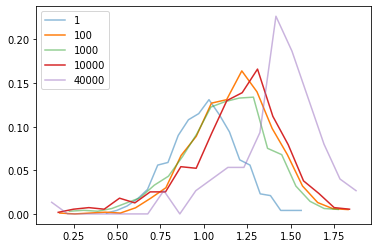

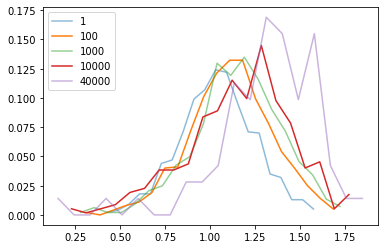

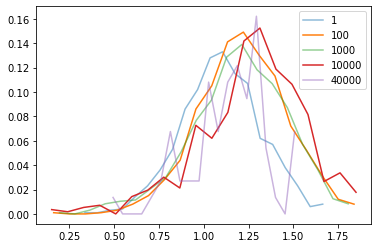

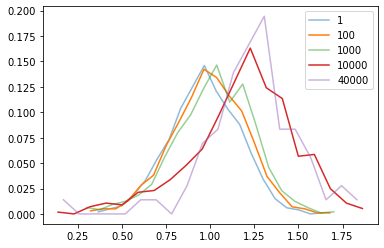

In [74]:
for k in L_dict.keys() :
    n=0
    for s in step :
        n+=1
        array = L_dict[k][s, 1:]
        cleaned_array = array[~np.isnan(array)]
        
        phi, x = np.histogram(cleaned_array, bins=20)
        xbar = np.average(x)
        
        plt.plot(0.5*(x[1:]+x[:-1])/xbar, phi/np.sum(phi), label = s, alpha = 0.5*n)
        distrib[s] = [0.5*(x[1:]+x[:-1])/xbar, phi/np.sum(phi)]
        if s % 1000 == 0 :
            print(t, end='\r')
    plt.legend()
    plt.show()

# From Hydroosmotic to Hydraulic

======= CHAIN =======
Type         : hydraulic
Total length : 14.38355091101359
Current Time : 0
======= PARAMETERS =======
tau : 1.0
======= LUMENS =======
Nb lumens : 2
Lumen 0 is at position 0.00000 with length 0.00000 and pumping 0.00000
Lumen 1 is at position 5.91665 with length 0.91665 and pumping 0.00000
Lumen 2 is at position 8.39480 with length 0.98875 and pumping 0.00000
Lumen -1 is at position 14.38355 with length 0.00000 and pumping 0.00000
======= BRIDGES ======
Bridge 0 : (0, 1) has length 5.00000 with pumping 0.00000
Bridge 1 : (1, 2) has length 0.57276 with pumping 0.00000
Bridge 2 : (2, -1) has length 5.00000 with pumping 0.00000



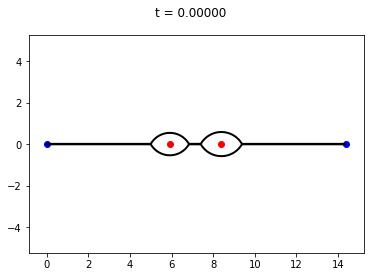

Import successful !


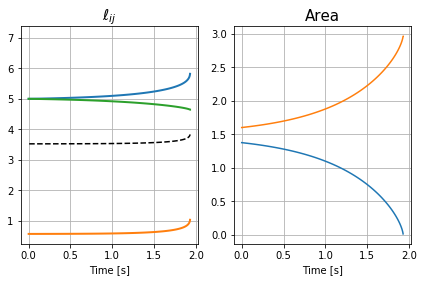

In [83]:
conf, ch = chain.load_config(os.path.join('/Users/mathieuleverge/git/chain_lumen/_data/osmotic/2lumens/out_hydrau/', 'config.conf'))
print(ch)
x = np.linspace(0., ch.total_length, 1001)

tools.plot_profile(x, ch)

plot = 1
if plot :
    ell_hydrau = tools.load_brfile(os.path.join('/Users/mathieuleverge/git/chain_lumen/_data/osmotic/2lumens/out_hydrau/', 'sim_bridges.dat'))

    L_hydrau, pos_hydrau = tools.load_file(os.path.join('/Users/mathieuleverge/git/chain_lumen/_data/osmotic/2lumens/out_hydrau/', 'sim_all.dat'), hydroosmotic=False)
    tools.plot_evolution_hydraulic(L_hydrau, ell_hydrau)




======= CHAIN =======
Type         : hydroosmotic
Total length : 14.38355091101359
Current Time : 0
Screening lengths : 
        xi_s = 0.03524253593622103
        xi_v = 176.21267968110516
Permeation times :
       tau_s = 0.01
       tau_v = 31.0
Pumping : None
======= LUMENS =======
Nb lumens : 2
Lumen 0 is at position 0.00000 with length 0.00000 and 0.00000 ions with pumping 0.00000
Lumen 1 is at position 5.91665 with length 0.91665 and 1.37617 ions with pumping 0.00000
Lumen 2 is at position 8.39480 with length 0.98875 and 1.60117 ions with pumping 0.00000
Lumen -1 is at position 14.38355 with length 0.00000 and 0.00000 ions with pumping 0.00000
======= BRIDGES ======
Bridge 0 : (0, 1) has length 5.00000 with pumping 0.00000
Bridge 1 : (1, 2) has length 0.57276 with pumping 0.00000
Bridge 2 : (2, -1) has length 5.00000 with pumping 0.00000



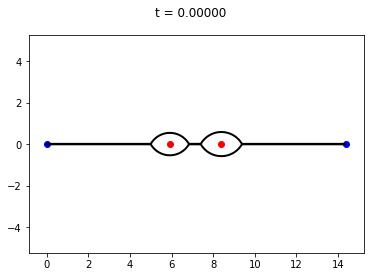

Import successful !


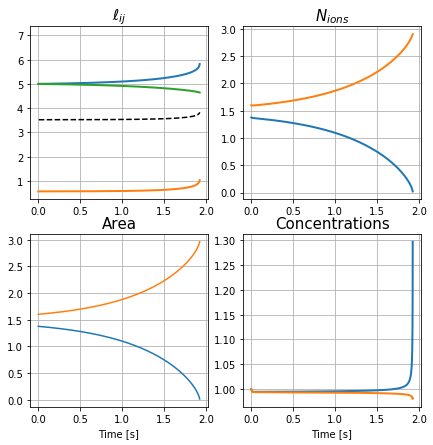

In [94]:
conf, ch = chain.load_config(os.path.join('/Users/mathieuleverge/git/chain_lumen/_data/osmotic/2lumens/out_osm/', 'config.conf'))
print(ch)
x = np.linspace(0., ch.total_length, 1001)

tools.plot_profile(x, ch)

plot = 1
if plot :
    ell_osm = tools.load_brfile(os.path.join('/Users/mathieuleverge/git/chain_lumen/_data/osmotic/2lumens/out_osm/', 'sim_bridges.dat'))
    L_osm, nions_osm, pos_osm = tools.load_file(os.path.join('/Users/mathieuleverge/git/chain_lumen/_data/osmotic/2lumens/out_osm/', 'sim_all.dat'), hydroosmotic=True)
    tools.plot_evolution(L_osm, nions_osm, ell_osm)





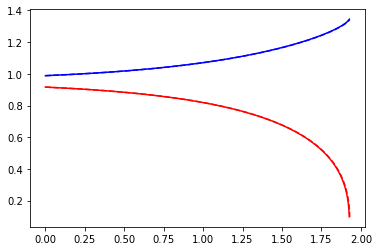

In [95]:
#plt.xscale('log')

plt.plot(L_hydrau[:,0], L_hydrau[:, 1], label = 'hydrau, 1', color = 'r', linestyle = '--')
plt.plot(L_hydrau[:,0], L_hydrau[:, 2], label = 'hydrau, 2', color = 'b', linestyle = '--')

plt.plot(L_osm[:,0], L_osm[:, 1], label = 'osm, 1', color = 'r')
plt.plot(L_osm[:,0], L_osm[:, 2], label = 'osm, 2', color = 'b')

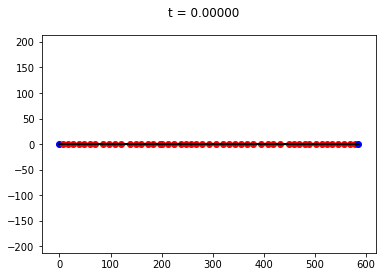

Import successful !


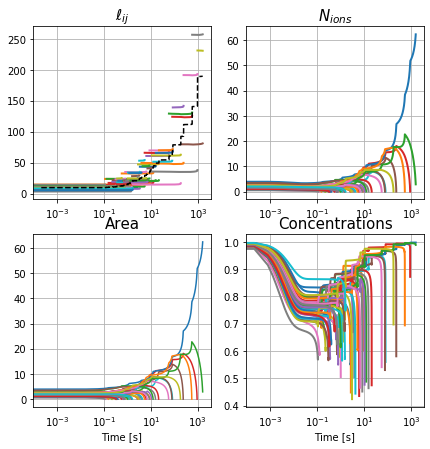

In [165]:
subdir = 'osmotic/N100/largetau/chis5_chiv50/run0000'
conf, ch = chain.load_config(os.path.join(main_dir, subdir, 'config.conf'))
#print(ch)
x = np.linspace(0., ch.total_length, 1001)
tools.plot_profile(x, ch)

ell = tools.load_brfile(os.path.join(main_dir, subdir, 'sim_bridges.dat'))

x_log = 1

if ch.lumen_type == 'hydroosmotic' :
    L, nions, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=True)
    tools.plot_evolution(L, nions, ell, x_logscale=x_log)
else :
    L, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=False)
    tools.plot_evolution_hydraulic(L, ell, x_logscale=x_log)



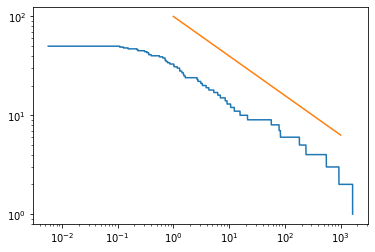

In [166]:
Nt50 = np.loadtxt(os.path.join(main_dir, subdir, 'sim_nlum.dat'))

plt.xscale('log')
plt.yscale('log')
plt.plot(Nt50[10:, 0], Nt50[10:, 1])

k, a = 100, -2./5
t = np.logspace(0, 3, 101)

plt.plot(t, k*t**a)

In [167]:
L_d = open(os.path.join(main_dir, subdir, 'distrib_length.dat'), 'r').readlines()
N_d = open(os.path.join(main_dir, subdir, 'distrib_nion.dat'), 'r').readlines()

In [158]:
def distrib(line, nbins=10) :
    time = float(line.split('\t')[0])
    s = line[1:].split('\t')
    values = []
    for elem in s :
        if elem != '' and elem != '\n' :
            values += [float(elem)]
    return time, np.histogram(values, bins=nbins)


In [162]:
phi_L = []
for line in L_d : 
    phi_L += [distrib(line)]
    
phi_N = []
for line in N_d : 
    phi_N += [distrib(line)]

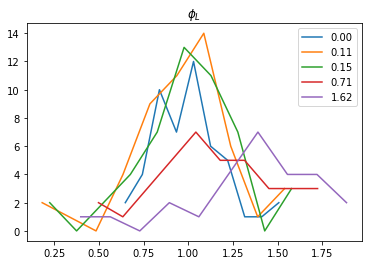

In [163]:
t_steps = [0, 100, 200, 1000, 2000]
for t in t_steps :
    plt.plot(0.5*(phi_L[t][1][1][1:] + phi_L[t][1][1][:-1]), phi_L[t][1][0], label = "{:2.2f}".format(phi_L[t][0]))
    
plt.legend(fontsize=10)
plt.title('$\phi_L$')
plt.show()

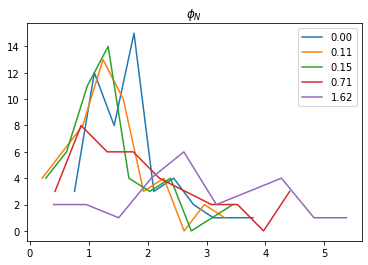

In [164]:
t_steps = [0, 100, 200, 1000, 2000]
for t in t_steps :
    plt.plot(0.5*(phi_N[t][1][1][1:] + phi_N[t][1][1][:-1]), phi_N[t][1][0], label = "{:2.2f}".format(phi_N[t][0]))
    
plt.legend(fontsize=10)
plt.title('$\phi_N$')
plt.show()